In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
%config InlineBackend.figure_format='retina'
from processing_functions import *
import collections

from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['mathtext.fontset'] = 'dejavuserif'
rcParams['mathtext.rm'] = 'serif'
rcParams['mathtext.it'] = 'serif:italic'
rcParams['mathtext.bf'] = 'serif:bold'
rcParams['axes.titlepad'] = 12

In [2]:
param_list = [r'$\alpha$', r'$\log{M_\mathrm{1}}$', r'$\sigma_{\log{M}}$', r'$\log{M_\mathrm{0}}$', r'$\log{M_{\rm{min}}}$',\
              r'$A_{\rm{cen}}$', r'$A_{\rm{sat}}$']

In [3]:
%store -r
%store

Stored variables and their in-db values:
postcov_dict_19p0             -> {'25592': {'va': array([[  6.33919891e-04,   3.219
postcov_dict_19p5             -> {'16564': {'va': array([[  1.01658654e-03,   6.004
postcov_dict_20p0             -> {'41424': {'va': array([[  2.32643794e-03,   9.406
postcov_dict_20p5             -> {'72435': {'va': array([[  3.53899439e-03,   1.599
postcov_dict_21p0             -> {'77770': {'va': array([[  1.55910308e-02,   2.104
sigma_mean_19p0               -> array([[  2.53701263e-02,   3.06458733e-02,   2.63
sigma_mean_19p5               -> array([[ 0.05518435,  0.06165941,  0.23655152,  0.
sigma_mean_20p0               -> array([[  5.05370601e-02,   4.44974633e-02,   1.97
sigma_mean_20p5               -> array([[  6.68640963e-02,   4.23228848e-02,   1.33
sigma_mean_21p0               -> array([[ 0.06294976,  0.03558465,  0.11013751,  0.
sigma_stdm_19p0               -> array([[  6.00324748e-03,   7.35940133e-03,   3.08
sigma_stdm_19p5               -> ar

In [4]:
keylist = ['w','d','v','c','a','r','wd','wv','wc','wa','wr','dv','dc','da','dr','vc','va','vr','ca','cr','ar',\
        'wdv','wdc','wda','wdr','wvc','wva','wvr','wca','wcr','war','dvc','dva','dvr','dca','dcr','dar',\
         'vca','vcr','var','car','wdvc','wdva','wdvr','wdca','wdcr','wdar','wvca','wvcr','wvar','wcar',\
        'dvca','dvcr','dvar','dcar','vcar','wdvca','wdvcr','wdvar','wdcar','wvcar','dvcar','wdvcar']

In [13]:
comblist = [r'$w_\mathrm{p}(r_\mathrm{p})$',r'$\Delta\Sigma(r_\mathrm{p})$',\
            r'$w_\mathrm{p}(r_\mathrm{p})+\Delta\Sigma(r_\mathrm{p})$',\
            r'$w_\mathrm{p}(r_\mathrm{p})+\Delta\Sigma(r_\mathrm{p})+VPF(r)$',\
            r'$\rm{CIC}$',r'$\rm{CIA}$',r'$Q(N_{\mathrm{1}}/N_{\mathrm{2}})$',\
            r'$w_\mathrm{p}(r_\mathrm{p})+\rm{CIC}$',r'$w_\mathrm{p}(r_\mathrm{p})+\rm{CIA}$',\
            r'$w_\mathrm{p}(r_\mathrm{p})+Q(N_{\mathrm{1}}/N_{\mathrm{2}})$',\
            r'$w_\mathrm{p}(r_\mathrm{p})+\rm{CIC}+\rm{CIA}$',\
            r'$w_\mathrm{p}(r_\mathrm{p})+\rm{CIC}+Q(N_{\mathrm{1}}/N_{\mathrm{2}})$',\
            r'$w_\mathrm{p}(r_\mathrm{p})+\rm{CIA}+Q(N_{\mathrm{1}}/N_{\mathrm{2}})$',\
            r'$w_\mathrm{p}(r_\mathrm{p})+\Delta\Sigma(r_\mathrm{p})+VPF(r)+$'+'\n'+r'$\rm{CIC}+\rm{CIA}+Q(N_{\mathrm{1}}/N_{\mathrm{2}})$']

In [14]:
combidx = [0,1,6,21,3,4,5,8,9,10,28,29,30,62]
np.array(klist)[combidx]

array(['w', 'd', 'wd', 'wdv', 'c', 'a', 'r', 'wc', 'wa', 'wr', 'wca',
       'wcr', 'war', 'wdvcar'],
      dtype='|S6')

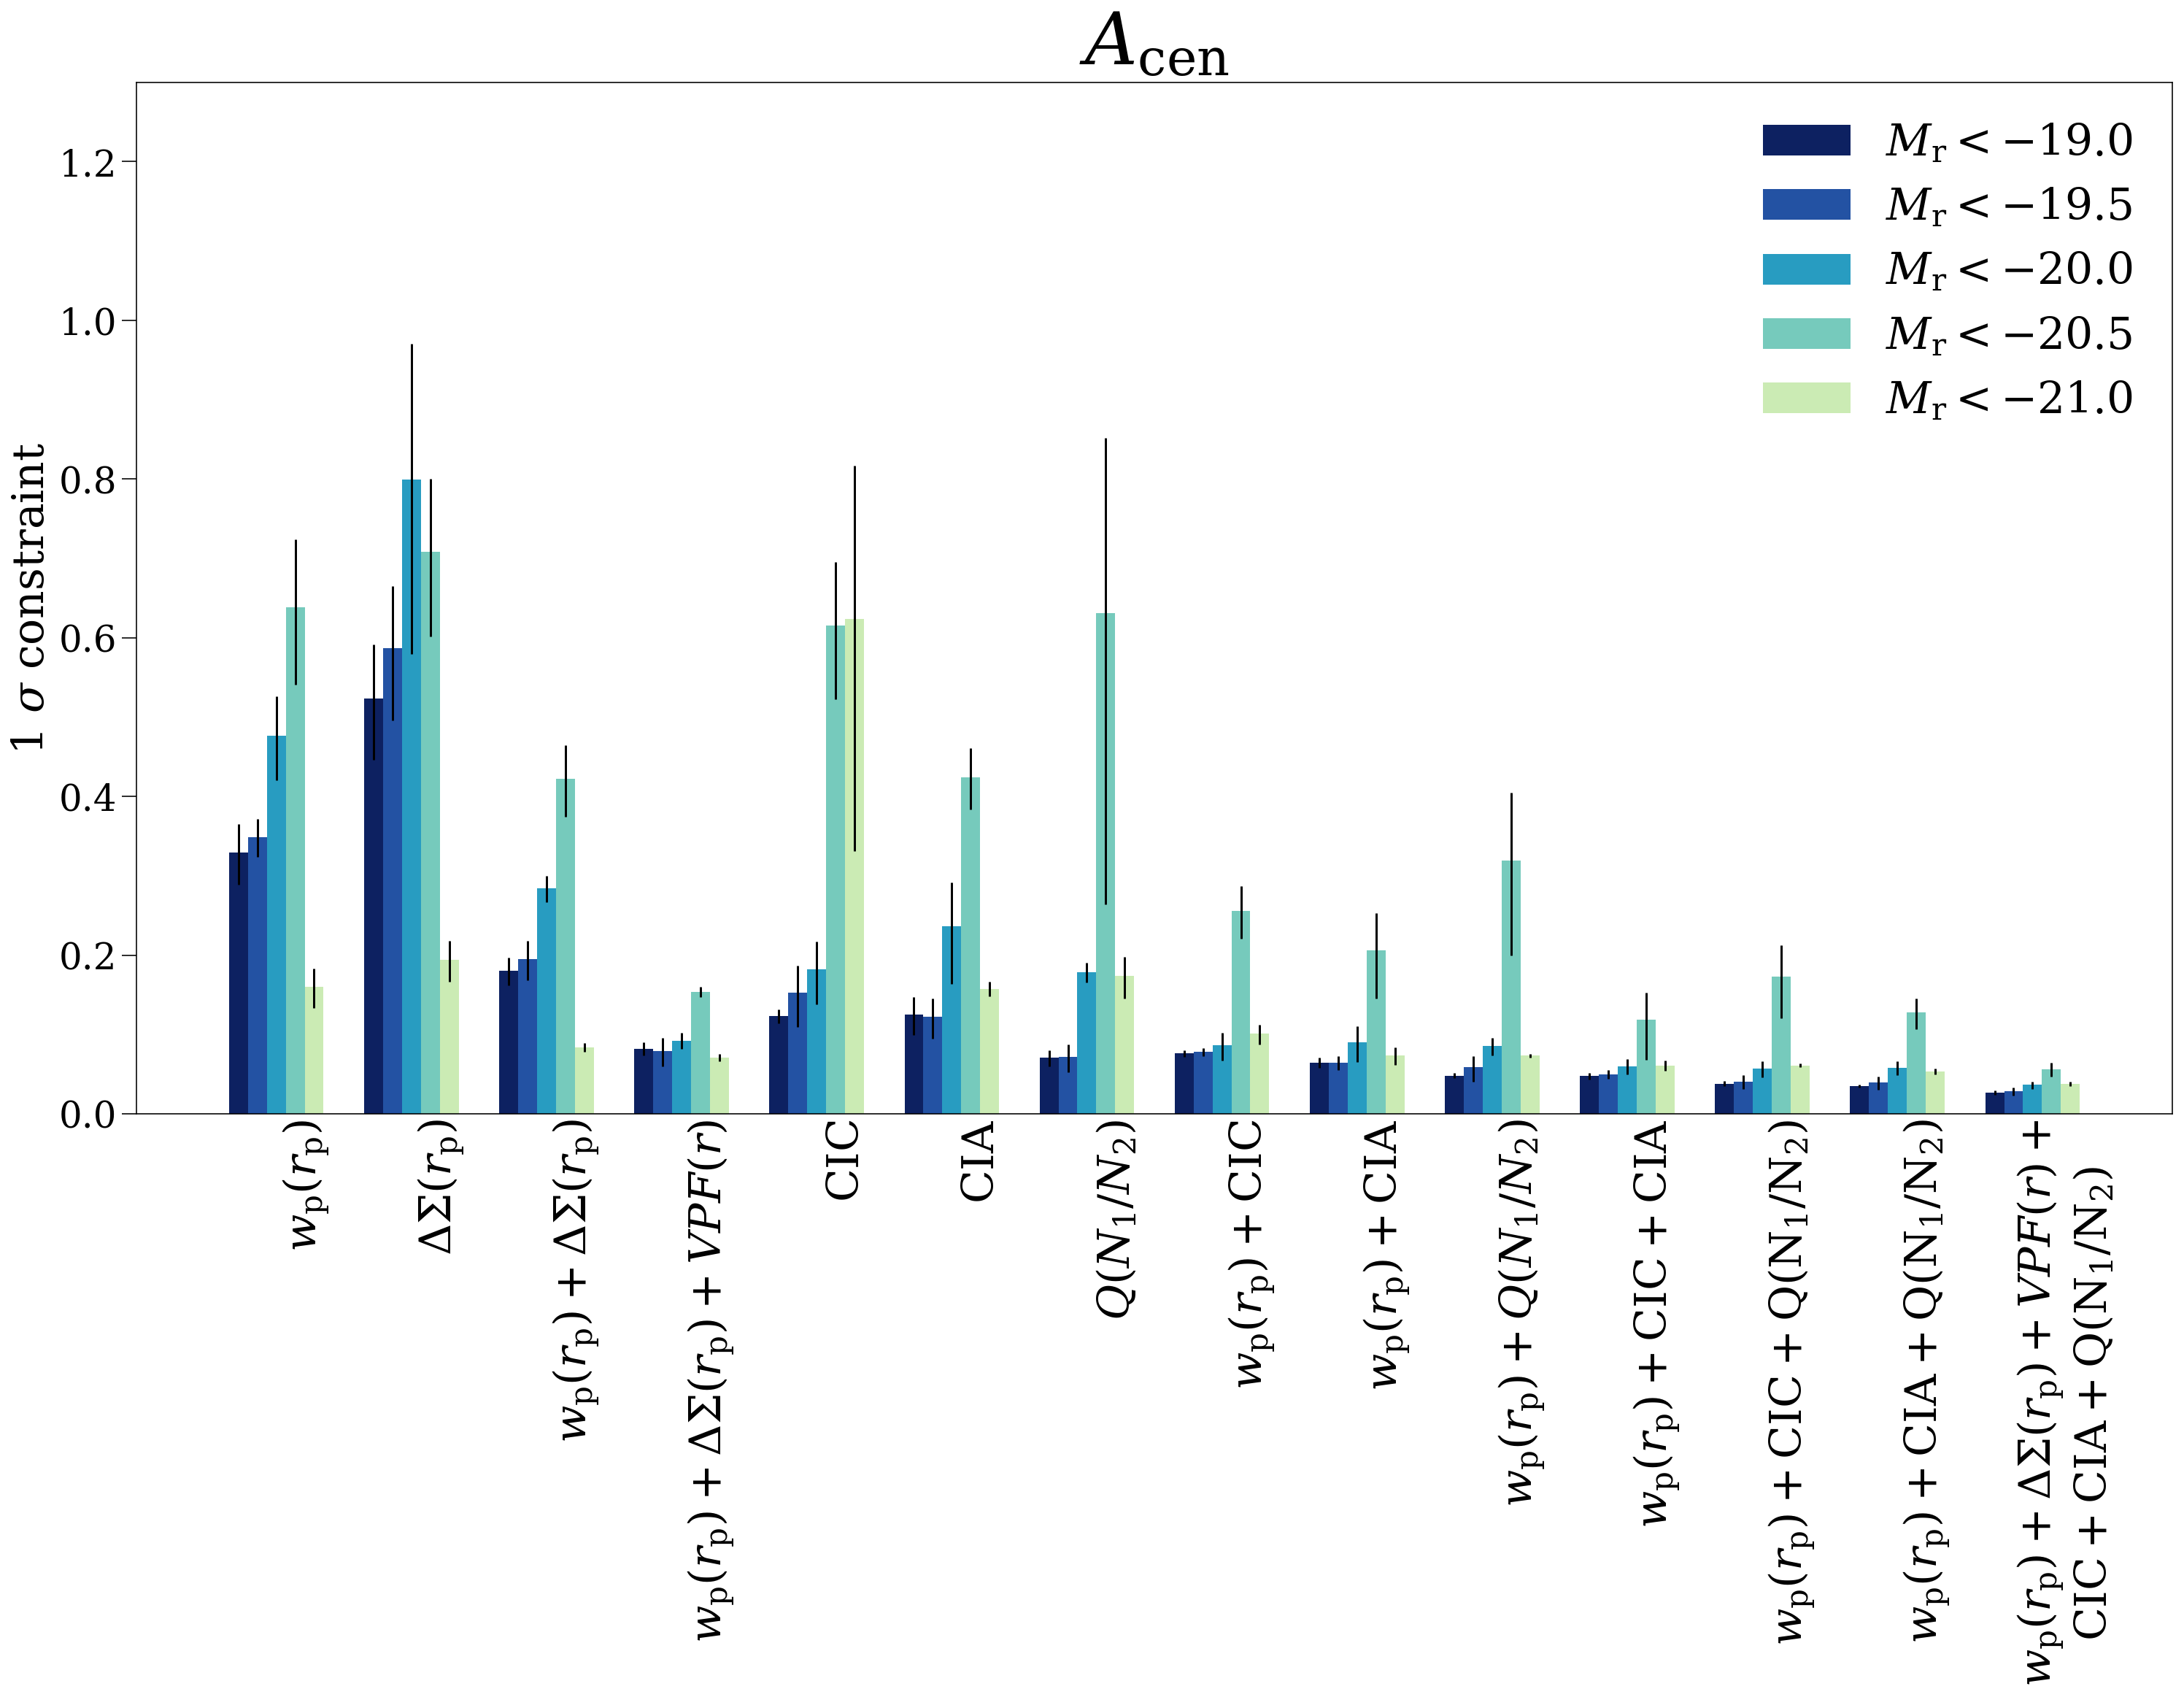

In [18]:
N = 14

ind = np.arange(N)  # the x locations for the groups
width = 0.14       # the width of the bars

fig, ax = plt.subplots(figsize=(25,13))
rects1 = ax.bar(ind, sigma_mean_19p0[combidx,5], width, color=cm.YlGnBu(250), yerr=[sigma_stdm_19p0[combidx,5],sigma_stdp_19p0[combidx,5]])
rects2 = ax.bar(ind+width, sigma_mean_19p5[combidx,5], width, color=cm.YlGnBu(200), yerr=[sigma_stdm_19p5[combidx,5],sigma_stdp_19p5[combidx,5]])
rects3 = ax.bar(ind+width*2, sigma_mean_20p0[combidx,5], width, color=cm.YlGnBu(150), yerr=[sigma_stdm_20p0[combidx,5],sigma_stdp_20p0[combidx,5]])
rects4 = ax.bar(ind+width*3, sigma_mean_20p5[combidx,5], width, color=cm.YlGnBu(100), yerr=[sigma_stdm_20p5[combidx,5],sigma_stdp_20p5[combidx,5]])
rects5 = ax.bar(ind+width*4, sigma_mean_21p0[combidx,5], width, color=cm.YlGnBu(60), yerr=[sigma_stdm_21p0[combidx,5],sigma_stdp_21p0[combidx,5]])

# add some text for labels, title and axes ticks
ax.set_ylabel(r'$1\ \sigma\ \rm{constraint}$',fontsize=30)
ax.set_title(r'$A_{\rm{cen}}$',fontsize=50)
ax.set_xticks(np.arange(N)+0.5)
ax.set_xticklabels(comblist,rotation=90,fontsize=30)
ax.set_yticklabels([0.0,0.2,0.4,0.6,0.8,1.0,1.2],fontsize=25)
ax.tick_params(axis='x',length=0)
ax.tick_params(axis='y',length=10)


ax.legend((rects1[0], rects2[0], rects3[0], rects4[0], rects5[0]),\
          (r'$M_{\rm{r}}<-19.0$',r'$M_{\rm{r}}<-19.5$',r'$M_{\rm{r}}<-20.0$',r'$M_{\rm{r}}<-20.5$',r'$M_{\rm{r}}<-21.0$'),frameon=False,fontsize=30)

ax.set_ylim(0,1.3)

plt.show()

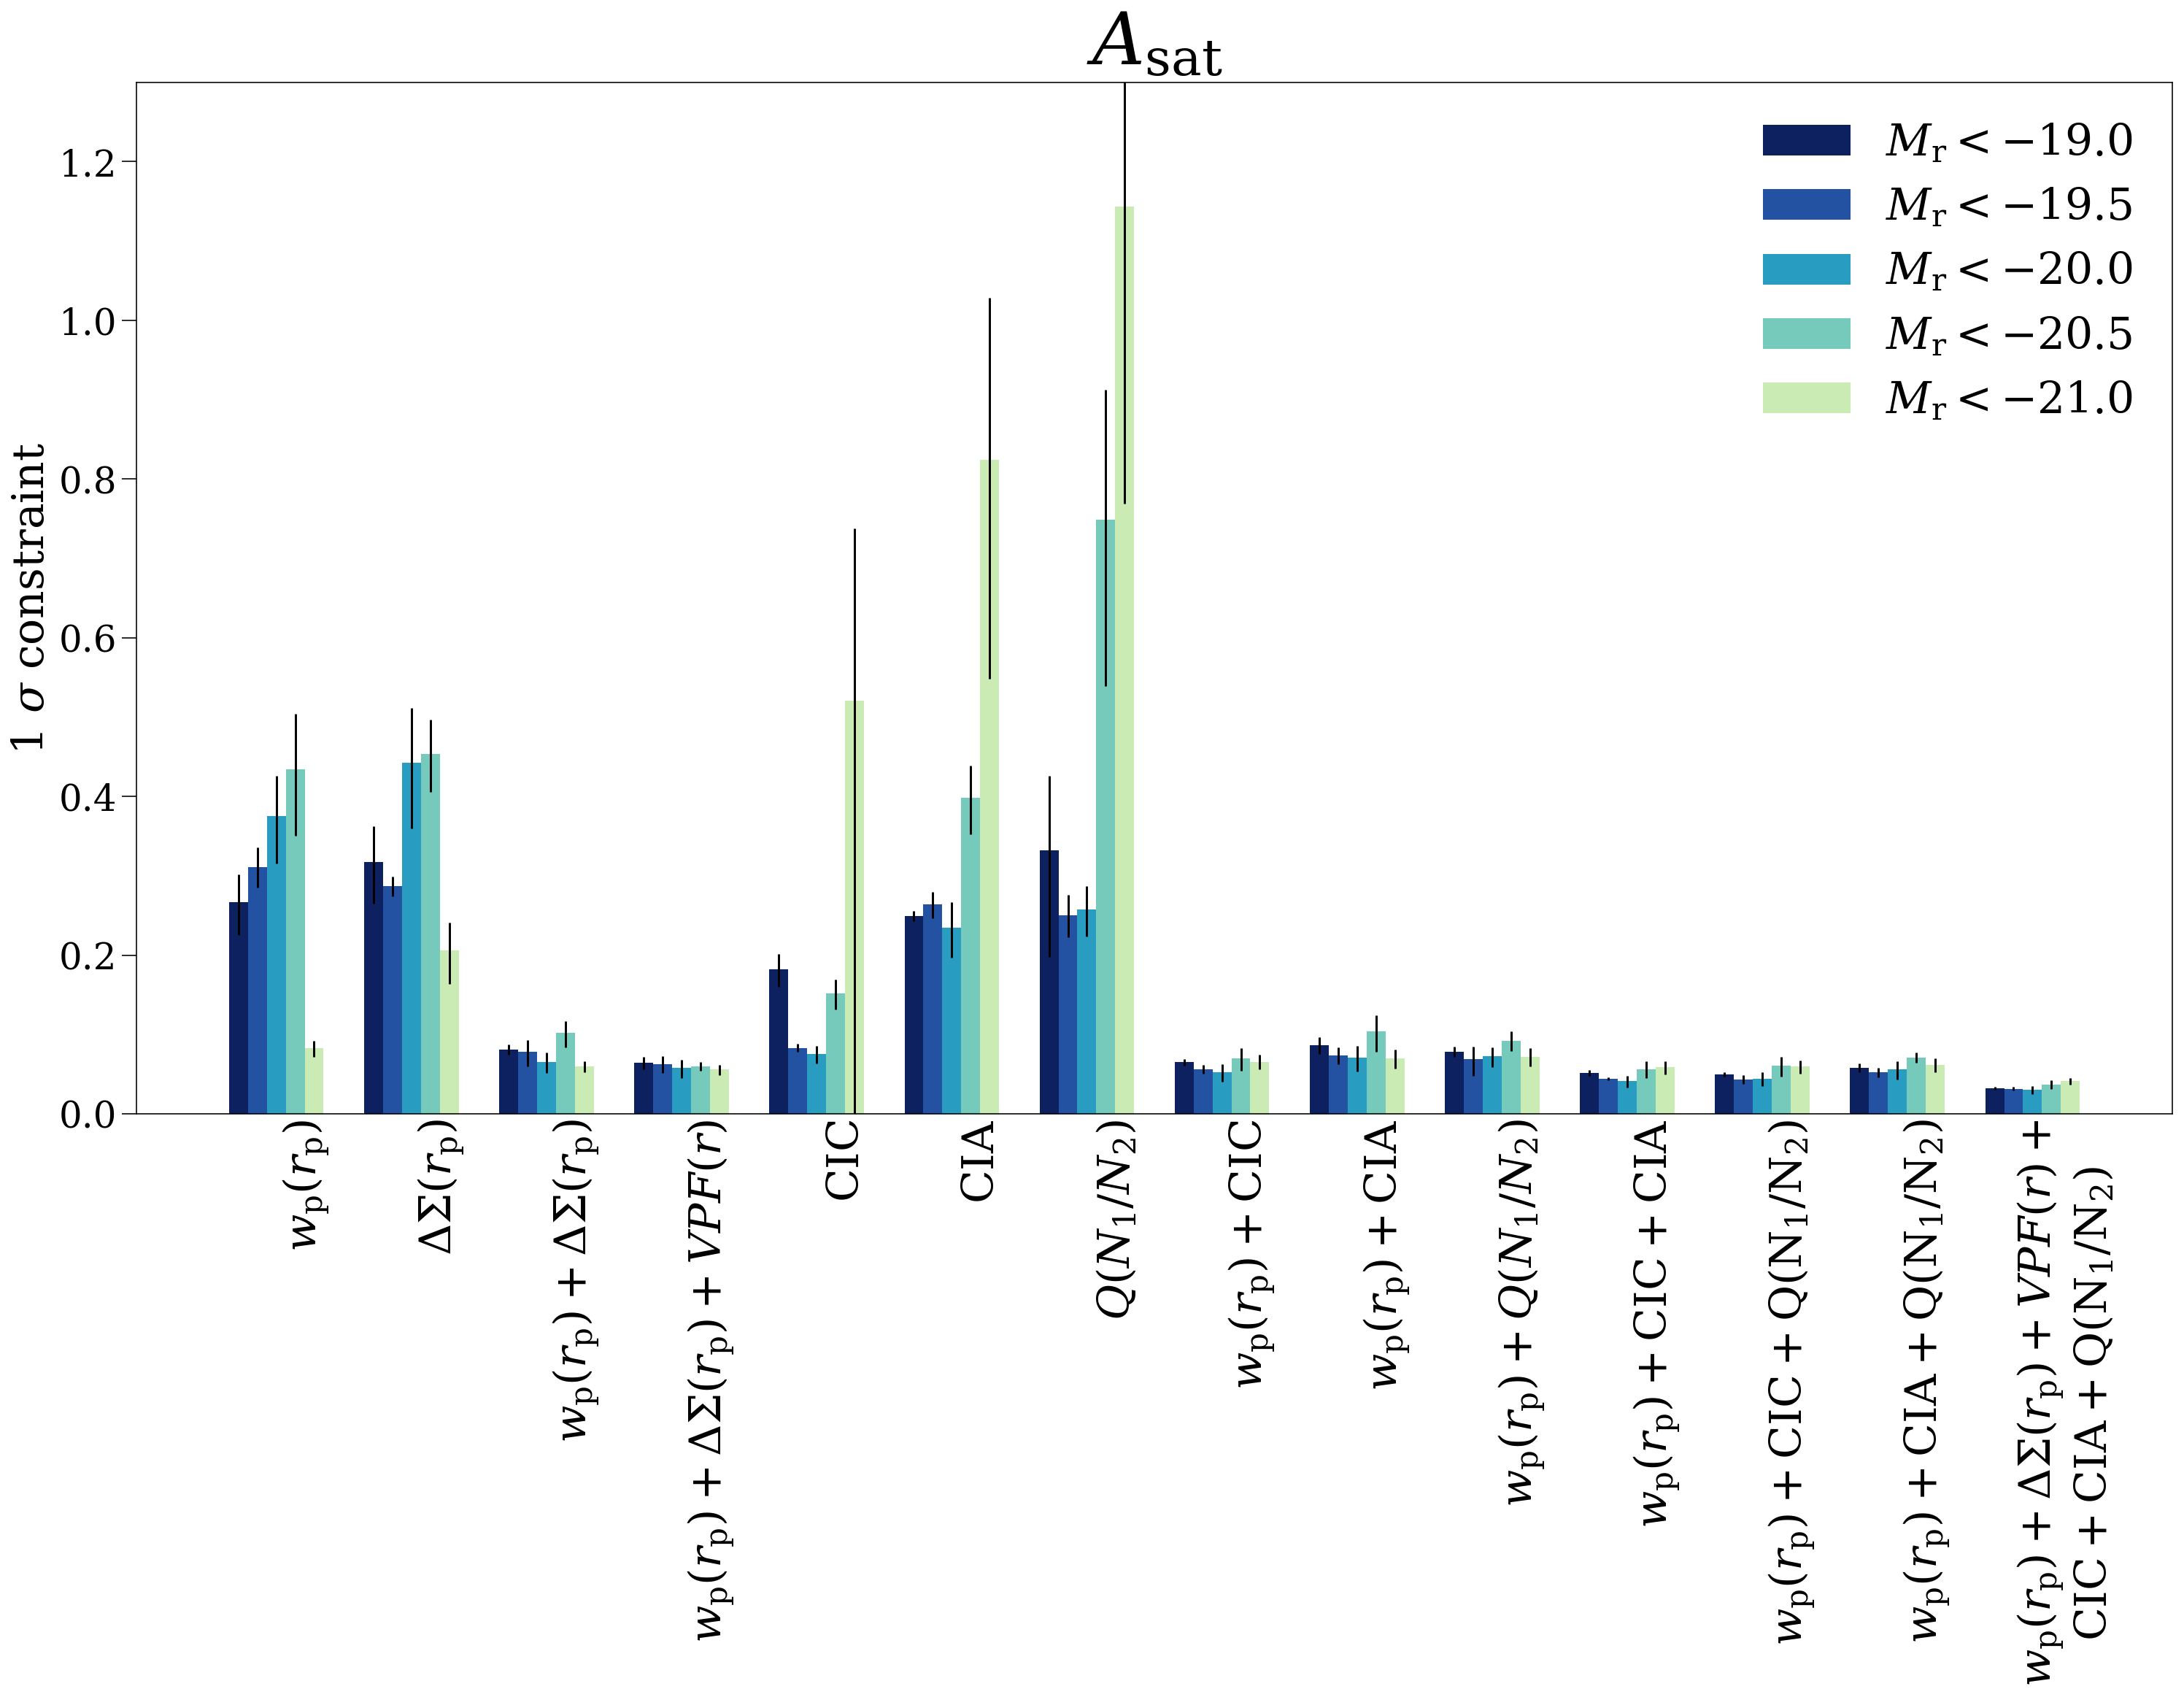

In [20]:
N = 14

ind = np.arange(N)  # the x locations for the groups
width = 0.14       # the width of the bars

fig, ax = plt.subplots(figsize=(25,13))
rects1 = ax.bar(ind, sigma_mean_19p0[combidx,6], width, color=cm.YlGnBu(250), yerr=[sigma_stdm_19p0[combidx,6],sigma_stdp_19p0[combidx,6]])
rects2 = ax.bar(ind+width, sigma_mean_19p5[combidx,6], width, color=cm.YlGnBu(200), yerr=[sigma_stdm_19p5[combidx,6],sigma_stdp_19p5[combidx,6]])
rects3 = ax.bar(ind+width*2, sigma_mean_20p0[combidx,6], width, color=cm.YlGnBu(150), yerr=[sigma_stdm_20p0[combidx,6],sigma_stdp_20p0[combidx,6]])
rects4 = ax.bar(ind+width*3, sigma_mean_20p5[combidx,6], width, color=cm.YlGnBu(100), yerr=[sigma_stdm_20p5[combidx,6],sigma_stdp_20p5[combidx,6]])
rects5 = ax.bar(ind+width*4, sigma_mean_21p0[combidx,6], width, color=cm.YlGnBu(60), yerr=[sigma_stdm_21p0[combidx,6],sigma_stdp_21p0[combidx,6]])

# add some text for labels, title and axes ticks
ax.set_ylabel(r'$1\ \sigma\ \rm{constraint}$',fontsize=30)
ax.set_title(r'$A_{\rm{sat}}$',fontsize=50)
ax.set_xticks(np.arange(N)+0.5)
ax.set_xticklabels(comblist,rotation=90,fontsize=30)
ax.set_yticklabels([0.0,0.2,0.4,0.6,0.8,1.0,1.2],fontsize=25)
ax.tick_params(axis='x',length=0)
ax.tick_params(axis='y',length=10)


ax.legend((rects1[0], rects2[0], rects3[0], rects4[0], rects5[0]),\
          (r'$M_{\rm{r}}<-19.0$',r'$M_{\rm{r}}<-19.5$',r'$M_{\rm{r}}<-20.0$',r'$M_{\rm{r}}<-20.5$',r'$M_{\rm{r}}<-21.0$'),frameon=False,fontsize=30)

ax.set_ylim(0,1.3)

plt.show()